# Shallow ANN (1 Hidden Layer) in TensorFlow to solve MNIST 

#### Load Dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt


In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
type(X_train)

numpy.ndarray

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

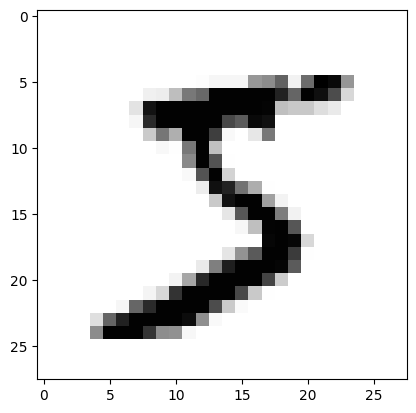

In [7]:
plt.imshow(X_train[0], cmap='Greys')

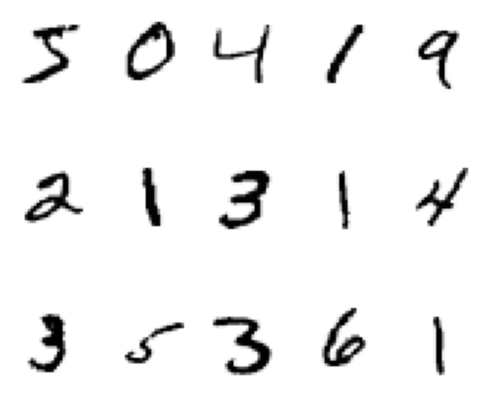

In [8]:
plt.figure(figsize=(5,5))
for k in range(15):
    plt.subplot(3,5,k+1)
    plt.imshow(X_train[k],cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
X_valid.shape

(10000, 28, 28)

#### Preprocess data
1. normanlize X images to scale 0 to 1
2. one-hot encoding for y

In [10]:
X_train = X_train.reshape(60000,784).astype('float32')
X_valid = X_valid.reshape(10000,784).astype('float32')

In [11]:
X_train /= 255
X_valid /= 255

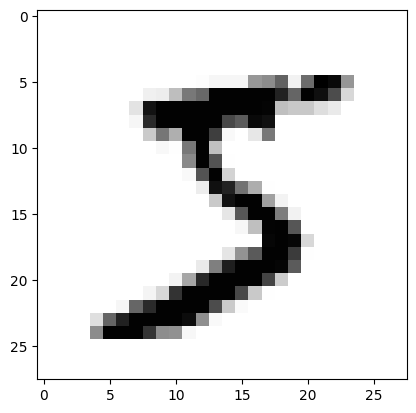

In [12]:
plt.imshow(X_train[0].reshape(28,28),cmap='Greys')

In [13]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [15]:
y_train.shape

(60000, 10)

### Design NN Architecture

In [54]:
model =Sequential()

# hidden layer
model.add(Dense(64, activation='relu',input_shape=(784,)))

#model.add(Dense(64, activation='tanh',input_shape=(784,)))

#model.add(Dense(64, activation='sigmoid',input_shape=(784,)))

#model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

c:\Users\keztan\workspace\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile model

In [56]:
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

### Train Model

In [64]:
hist = model.fit(X_train,y_train,batch_size=128, epochs=500, verbose=1, validation_data=(X_valid,y_valid))

Epoch 1/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9301 - loss: 0.0112 - val_accuracy: 0.9321 - val_loss: 0.0110
Epoch 2/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9283 - loss: 0.0114 - val_accuracy: 0.9321 - val_loss: 0.0110
Epoch 3/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9264 - loss: 0.0116 - val_accuracy: 0.9323 - val_loss: 0.0110
Epoch 4/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9281 - loss: 0.0113 - val_accuracy: 0.9323 - val_loss: 0.0110
Epoch 5/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9274 - loss: 0.0114 - val_accuracy: 0.9323 - val_loss: 0.0110
Epoch 6/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9298 - loss: 0.0112 - val_accuracy: 0.9325 - val_loss: 0.0110
Epoch 7/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9303 - loss: 0.0110 - val_accuracy: 0.9325 - val_loss: 0.0110
Epoch 8/500
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9302 - loss: 0.0111 - val_accu

In [58]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

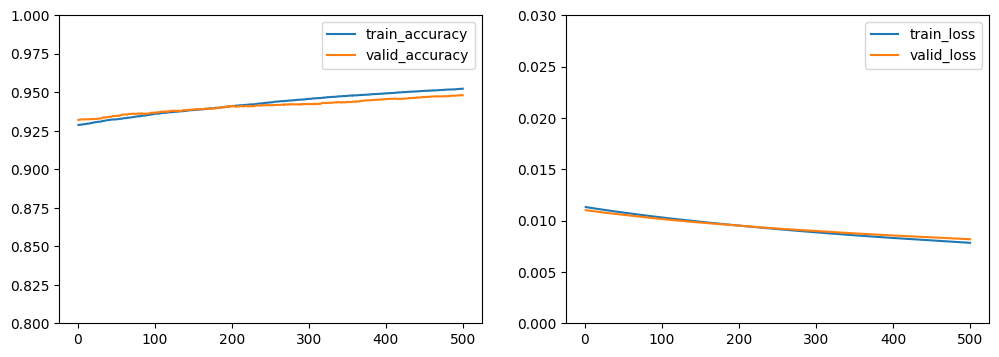

In [65]:
fig, axes = plt.subplots(1,2,figsize=(12,4))

epoches = range(1,501)

axes[0].plot(epoches, hist.history['accuracy'], label = 'train_accuracy')
axes[0].plot(epoches, hist.history['val_accuracy'], label = 'valid_accuracy')
axes[0].axis('tight')
axes[0].set_ylim([0.8,1])
axes[0].legend()

axes[1].plot(epoches, hist.history['loss'], label = 'train_loss')
axes[1].plot(epoches, hist.history['val_loss'], label = 'valid_loss')
axes[1].axis('tight')
axes[1].set_ylim([0,0.03])
axes[1].legend()




In [33]:
valid_0= X_valid[0].reshape(1,784)
model.predict(valid_0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[0.00432983, 0.00179577, 0.00345817, 0.00797926, 0.00661158,
        0.00991765, 0.00106704, 0.90128285, 0.00631957, 0.0572383 ]],
      dtype=float32)

In [35]:
model.predict(valid_0).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


7

In [39]:
X_valid[0].reshape(1,784)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  